In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import NoReturn, List
from numpy.typing import NDArray

In [6]:
def plot_ma(series: pd.Series, window: int, conf_int: bool = True) -> NoReturn:
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15, 5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    if conf_int:
        rolling_std = series.rolling(window=window).std()
        upper_bond = rolling_mean + 1.96 * rolling_std
        lower_bond = rolling_mean - 1.96 * rolling_std
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
    plt.plot(series, label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()


def exp_smooth(series: pd.Series, alpha: float) -> NDArray[float]:
    result = [series[0]]  # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n - 1])
    return np.array(result)


def exp_smooth_plot(series: pd.Series, alpha: List[float]) -> NoReturn:
    plt.figure(figsize=(15, 5))
    for a in alpha:
        plt.plot(exp_smooth(series, a), label=f'Alpha {a}')
    plt.plot(series.values, "c", label='Actual')
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True)
    plt.show()


def double_exp_smooth(series: pd.Series, alpha: float, beta: float) -> NDArray[float]:
    result = [series[0]]
    for n in range(1, len(series) + 1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series):
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)  # NOQA
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return np.array(result)


def double_exp_smooth_plot(series: pd.Series, alpha: List[float], beta: List[float]) -> NoReturn:
    plt.figure(figsize=(15, 5))
    for a in alpha:
        for b in beta:
            plt.plot(double_exp_smooth(series, a, b), label="Alpha {}, beta {}".format(a, b))
    plt.plot(series.values, label="Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    plt.show()

In [13]:
import sys
sys.path.insert(1, 'D:/kaneshi')
import kaneshi

from kaneshi.core.market_data import MarketData

m_config = {'symbol': 'XRPUSDT',
            'interval': 1,
            's_date': (2023, 1, 1),
            'e_date': (2024, 1, 1),
            'columns': 'Close',
            'price_type': 'Close',
           }

market = MarketData.from_config(**m_config)

data = market.raw_df['Close'][:1_000]

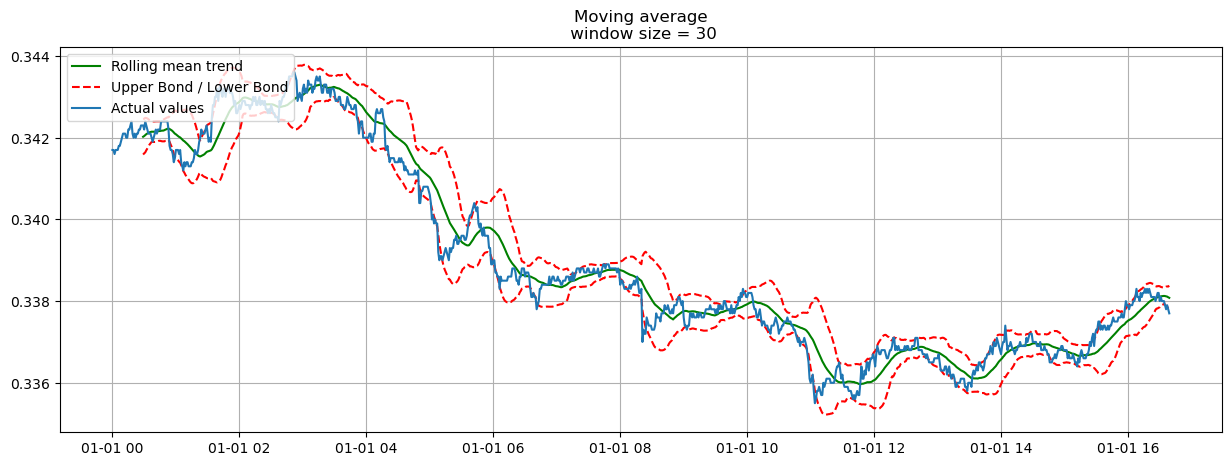

In [14]:
plot_ma(data, 30)

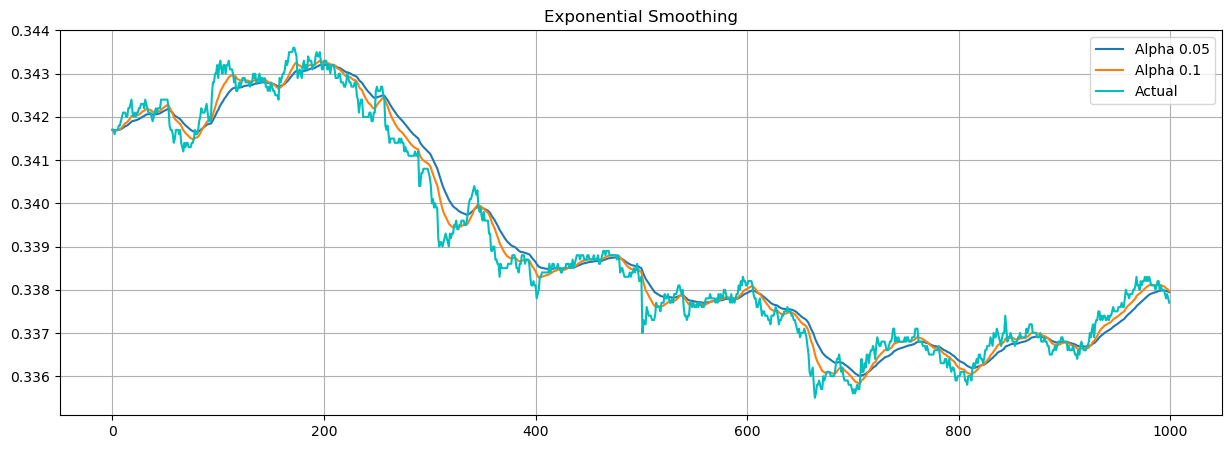

In [15]:
exp_smooth_plot(data, [0.05, 0.1])

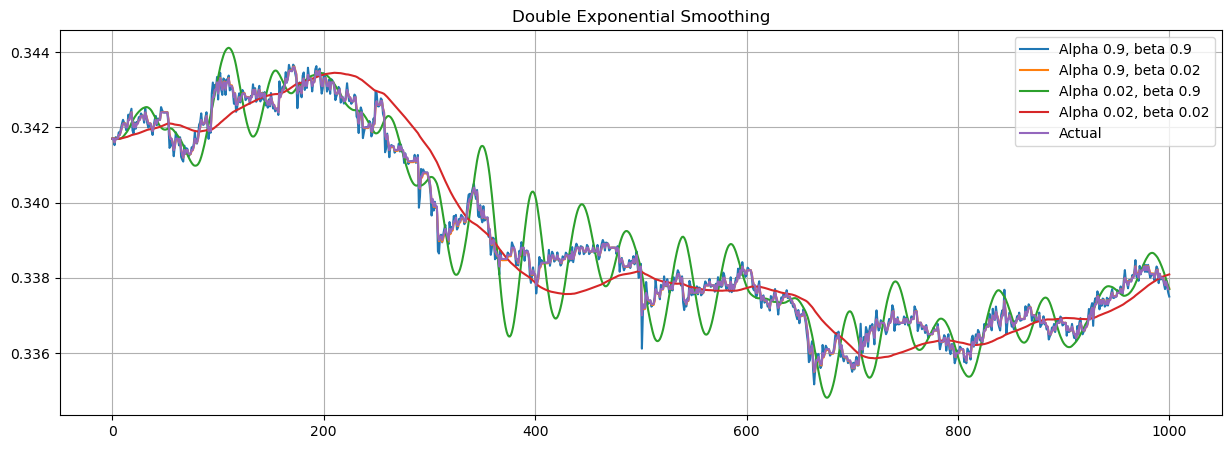

In [16]:
double_exp_smooth_plot(data, [0.9, 0.02], [0.9, 0.02])